# Limited Run Games Binary Classification

## Business Case
Limited Run Games is a small video game publishing company that specializes in producing physical copies of video games that were originally only made digital. They operate in the video game industry, which is a rapidly growing market that generated  a record breaking 97.67 billion U.S. dollars in 2022. Limited Run Games operates under a businness to consumer model, targeting fans and collectors of physical video games. The primary product they sell is limited-edition physical copies of digital games, with exclusive content and packaging that appeal to collectors. Limited Run Games fall under the small business category as they have approximately 20-30 employees. Although the company may participate physically at special events, their business is conducted online through their e-commerce website, allowing customers to purchase their products from anywhere in the world. Their website can be found at [limitedrungames.com](https://limitedrungames.com/pages/about-us)

### Description
The problem I am addressing is the uncertainty surrounding user purchasing behavior. By accurately predicting which users are more likely to purchase a product, Limited Run Games can optimize their marketing efforts and improve their sales performance. This solution will benefit both the company and the customers as it will target users more likely to make a purchase raising more awareness to those who may not previously heard about the company.

My goal is to develop a binary classification model that can accurately predict if a user will make a purchase on the Limited Run Games website. The solution will use AWS's supervised learning algorithm linear learner to analyze website visitor data and identify patterns in visitor behavior. I will then use these patterns to predict which visitors are more likely to make a purchase and how we can target more users that will make a purchase.

Limited Run Games will use this product by providing previous users data, analytics and how they interacted with the website to the model. The model will then analyze this data and provide predictions on who is mre likely to make a purchase. Limited Run games will use this information to optimize marketing and improve their sales performance.

### Value
By investing into this binary classification model to predict if a visitor will buy a product or not, Limited Run Games can allocate their resources more effectively, focusing on those visitors with a higher likelihood of conversion. This could lead to an increase in revenue and profitability, as well as better customer satisfaction as visitors would receive more personalized and targeted marketing messages. We can quantify the value of this approach by measuring the conversion rate of visitors predicted to make a purchase versus those that aren't. For example, if the conversion rate is currently at 2% and our model can increase it to 3%, that extra percent represents a 50% increase in conversions.

In order to achieve this, Limited Run Games would need to invest in data collection, analytics and marketing to effectively implemetn the model. This could include gathering more data on visitor behavior as well as optimizing marketing campaigns to target the most promising visitors. Implementing the model would also require consistent updates to ensure it remains accurate and effective over time.

Investing in this binary classification model has the potential to significantly improve the bottom line and customerr experience of Limited Run Games. By better understanding which visitors are most likely to make a purchase, they can make more informed decisions about where to focus its resources and marketing efforts. This will lead to higher conversion rates, increased revenue, and improved customer satisfaction, driving long-term success for the business. 

## Data

In [83]:
%pip install -qU --upgrade boto3
%pip install -qU --upgrade sagemaker

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [84]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import boto3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from time import gmtime, strftime

In [85]:
role = get_execution_role()
sess = sagemaker.Session() 
region = sess.boto_session.region_name
bucket = sess.default_bucket()
print("The role is ", role)
print("The session is ", sess)
print("The region is ", region)
print("The bucket is ", bucket)

The role is  arn:aws:iam::035791914788:role/LabRole
The session is  <sagemaker.session.Session object at 0x7fc008c85110>
The region is  us-east-1
The bucket is  sagemaker-us-east-1-035791914788


## Data Description - I will be using Linear Learner to make predictions based on the online shopper interntion dataset

The online shopper intention dataset [https://archive.ics.uci.edu/ml/machine-learning-databases/00468/] from UCI was collected to understand the factors that influence visitor purchasing decision on an e-commerce website.
The following describes the dataset columns:

* Administrative - The number of administrative pages that the user visited.
* Administrative_Duration - The amount of time spent on administrative pages.
* Informational - The number of informational pages the user visited.
* Informational_Duration - The amount of time spent on informational pages.
* ProductRelated - The number of product related pages the user visited.
* ProductRelated_Duration - The amount of time spent on product related pages.
* BounceRates - The percentage of visitors who enter through that page and exit without triggering additional tasks.
* ExitRates - Percentage of pageviews on the website that end at that specific page.
* PageValues - The average value for a page visited by a user before landing on the goal page or completing an Ecommerce transaction.
* SpecialDay - Measures how close the date of a site visit is to a special day (Christmas, Valentine's Day...).
* Month - The month the user visited the website.
* OperatingSystems - Integer value representing the operating system the user was on when viewing the page.
* Browser - Integer value representing the browser that the user was using to view the page.
* Region - Integer value representing which region the user is located in.
* TrafficType - Integer value representing what type of traffic the user is categorized into.
* VisitorType - Checks whether a visitor is a returning visitor, new visitor or other.
* Weekend - Boolean that represents if the user session is on a weekend.
* Revenue - Boolean that represents is the user made a purchase or not.
 
For the proof of concept, the data will be used to develop a binary classification model that predicts if a website visitor is likely to make a purchase or not based on their behaviour while on the website. The model will help Limited Run Games identify the best features and marketing strategies in driving sales and revenue.

The dataset used will be very similar to the data needed for Limited Run Games solution. However, they will need to update the current dataset of online shopper intention with their own.

I recommend they add more user behavior columns tailored to their company and update the datasets in real time to consistently optimize the accuracy of the model.

## Data exploration

In [86]:
# Read in the data from the games csv

shop_data = pd.read_csv('online_shoppers_intention.csv')

# Removing the administrative and administrative duration columns

del shop_data['Administrative']
del shop_data['Administrative_Duration']

Here I opened the online shoppers intention csv and deleted the administrative columns as the site admins will not be factored in when predicting if a user will make a sale.

In [87]:
# Need to move the Revenue column to the front since linear learner assumns the first column is the target variable

new_columns = ['Revenue','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
shop_data = shop_data.reindex(columns=new_columns)

#### Binary encoding the Revenue is 1 and False is 0

In [88]:
labelencoder = LabelEncoder()
shop_data['Revenue'] = labelencoder.fit_transform(shop_data['Revenue'])

labelencoder = LabelEncoder()
shop_data['Weekend'] = labelencoder.fit_transform(shop_data['Weekend'])

In [89]:
#### Label encoding the month and weekend column

shop_data['Month'].unique()
shop_data.head()

,Revenue,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0
3,0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0
4,0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1


#### Label encoding the months and visitor type

In [90]:
ordinalencoder = OrdinalEncoder(categories=[["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]])

shop_data['Month'] = ordinalencoder.fit_transform(shop_data[['Month']])

In [91]:
ordinalencoder2 = OrdinalEncoder(categories=[["Returning_Visitor", "New_Visitor", "Other"]])

shop_data['VisitorType'] = ordinalencoder2.fit_transform(shop_data[['VisitorType']])

In [92]:
# Printing the number of rows

print(f'The data collected is over the span of a year so as one can expect, the csv holds lots of data. The file has {shop_data.shape[0]} visitor sessions recorded!')

The data collected is over the span of a year so as one can expect, the csv holds lots of data. The file has 12330 visitor sessions recorded!


In [93]:
shop_data.head()

,Revenue,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1.0,1,1,1,1,0.0,0
1,0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1.0,2,2,1,2,0.0,0
2,0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1.0,4,1,9,3,0.0,0
3,0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1.0,3,2,2,4,0.0,0
4,0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1.0,3,3,1,4,0.0,1


In [94]:
# Checking to see if there are any missing values

shop_data.isnull().sum()

Revenue                    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

#### Boxplot

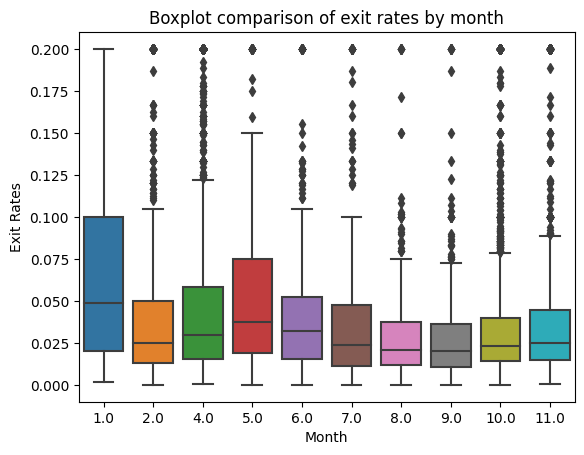

In [95]:
sns.boxplot(x='Month', y='ExitRates', data=shop_data)
plt.xlabel('Month')
plt.ylabel('Exit Rates')
plt.title('Boxplot comparison of exit rates by month')
plt.show()

Here we can see that the median exit rate is at its highest in February and lowest in October. This means that visitors are more likely to leave the website in February than other months.

#### Scatter plot

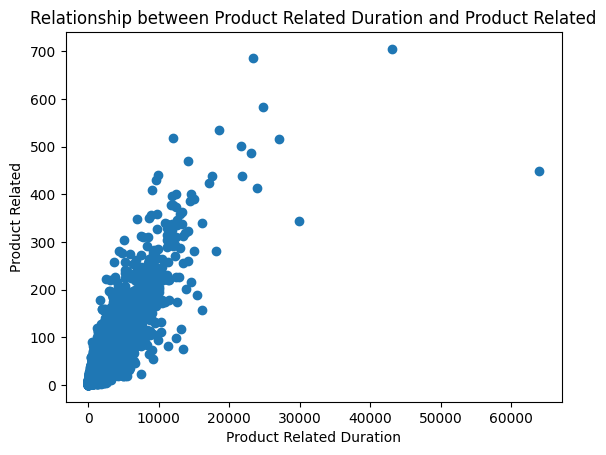

In [96]:
plt.scatter(shop_data['ProductRelated_Duration'], shop_data['ProductRelated'])
plt.xlabel('Product Related Duration')
plt.ylabel('Product Related')
plt.title('Relationship between Product Related Duration and Product Related')
plt.show()

Here we see that their is a positive relationship between the duration of product related pages visited and the number of product related pages visited which makes sense because the more product pages you visit, the more time you are likely to spend on them.

#### Stacked bar chart

Here I will use a scatter plot between two values to see if there is any correlation between the values. Let's see if there is a correlation between a teams field goal percentage and final score...

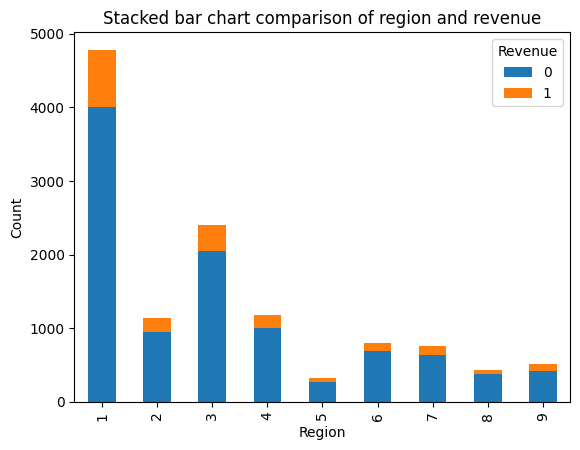

In [97]:
os_revenue = shop_data.groupby(['Region', 'Revenue']).size().unstack()
os_revenue.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked bar chart comparison of region and revenue')
plt.show()

This shows we have visitors from over 9 regions and region 1 is the most common region with the most revenue and non-revenue visits whereas region 5 has the least amount of revenue and non-revenue visits. 

# Split data into testing and training

In [98]:
# Shuffle and Split the data into 80% training and 20% testing

train_data, test_data = train_test_split(shop_data, test_size=0.2)

# Convert dataframes to back to CSV files and save them locally to the notebook and make sure to exclude the headers so taht Linear Learner will accept the file

train_data.to_csv('train.csv', header=False, index=False)
test_data.to_csv('test.csv', header=False, index=False)

In [99]:
# Copy the file to your S3 bucket using sess.upload_data
# You will need to pass the file to be uploaded, a prefix (top level folder to store the data) and the subfolders
# Here we will also define the output folder for the results

prefix = 'shop'
training_data_path = sess.upload_data( path='train.csv', key_prefix=prefix + '/train') 
testing_data_path = sess.upload_data( path='test.csv', key_prefix=prefix + '/test')
output_data_path = 's3://{}/{}/output'.format(bucket, prefix)
print(training_data_path)
print(testing_data_path)
print(output_data_path)

s3://sagemaker-us-east-1-035791914788/shop/train/train.csv
s3://sagemaker-us-east-1-035791914788/shop/test/test.csv
s3://sagemaker-us-east-1-035791914788/shop/output


# Training

Supervised learning is a type of machine learning where an algorithm learns from labled data to make predictions on new data. It involves a supervised process of training model using input features and corresponding output labels where the algorithm learns to map the input features to the output labels.

In the context of the dataset we are using, the problem is to predict if a website visitor will make a purchase or not, which is a binary classification problem. So therefore I will use the binary classification approach of supervised learning to train a model to make predictions. I wil use linear learner which is a type of linear model that can be used for binary classification tasks. It is relevant for this problem because it is a simple and efficient model that can handle large datasets.The model will determine based on the given dataset if a new visitor with new behaviors and variables will be likely to purchase a product given user history.

In [100]:
# specify containers

from sagemaker.image_uris import retrieve


# List of frameworks that can be retrieved https://sagemaker.readthedocs.io/en/stable/frameworks/index.html
# list of Built-in Algorithms that can be retrieved https://sagemaker.readthedocs.io/en/stable/algorithms/index.html

container = retrieve('linear-learner', region)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [101]:
# Amazon Estimator Documentation https://sagemaker.readthedocs.io/en/stable/algorithms/sagemaker.amazon.amazon_estimator.html

from sagemaker.estimator import Estimator 
ll_estimator = Estimator(container, 
                         role=role, 
                         instance_count=1, 
                         instance_type='ml.c4.xlarge', 
                         output_path=output_data_path)

In [102]:
# Set the linear learner hyperparameters
# hyperparameters can be found here https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# Here we will use the Hyperameter values for 


ll_estimator.set_hyperparameters(predictor_type='binary_classifier')

In [103]:
# Creating a channel from the S3 data source and file system

from sagemaker import TrainingInput 
training_data_channel = TrainingInput( s3_data=training_data_path, content_type='text/csv') 
testing_data_channel = TrainingInput( s3_data=testing_data_path, content_type='text/csv') 

### Find best hyperparameters

In [104]:
# Hyperparameters = https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# Objectives = https://docs.aws.amazon.com/sagemaker/latest/dg/linear-learner-tuning.html

from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hypertuner = HyperparameterTuner(ll_estimator, 
                                 objective_metric_name = 'test:binary_classification_accuracy',
                                 hyperparameter_ranges = {
                                 'learning_rate' : ContinuousParameter(0.01, 0.1),
                                 'mini_batch_size': CategoricalParameter([32,64,128,256,512])},
                                 objective_type = 'Maximize',
                                 metric_definitions = [{'Name': 'test:binary_classification_accuracy', 'Regex': 'loss (\S+)'}],
                                 max_jobs=10, 
                                 max_parallel_jobs=1
                                )

In [105]:
hypertuner.fit( {'train': training_data_channel, 'test': testing_data_channel})

INFO:sagemaker:Creating hyperparameter tuning job with name: linear-learner-230309-0433


........................................................................................................................................................................!


In [106]:
print("Best hyerparameter tuning job:{}".format(hypertuner.best_training_job()))
print("Best parameters found={}".format(hypertuner.best_estimator().hyperparameters()))

Best hyerparameter tuning job:linear-learner-230309-0433-001-d56a4d53

2023-03-09 04:38:02 Starting - Preparing the instances for training
2023-03-09 04:38:02 Downloading - Downloading input data
2023-03-09 04:38:02 Training - Training image download completed. Training in progress.
2023-03-09 04:38:02 Uploading - Uploading generated training model
2023-03-09 04:38:02 Completed - Resource reused by training job: linear-learner-230309-0433-002-ed9e23df
Best parameters found={'_tuning_objective_metric': 'test:binary_classification_accuracy', 'learning_rate': '0.07784235498972855', 'mini_batch_size': '32', 'predictor_type': 'binary_classifier'}


## Train model

In [107]:
# Set the linear learner hyperparameters
# hyperparameters can be found here https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# We will use the values discovered about for learning_rate and mini_batch_size

ll_estimator.set_hyperparameters(feature_dim='auto', 
                                 predictor_type='binary_classifier',
                                 mini_batch_size=32,
                                 learning_rate=0.07784235498972855,
                                 _tuning_objective_metric='test:binary_classification_accuracy')

In [108]:
# Now we are going to Fit the model
# Documentaiton for FIT https://sagemaker.readthedocs.io/en/stable/algorithms/sagemaker.amazon.amazon_estimator.html#sagemaker.amazon.amazon_estimator.AmazonAlgorithmEstimatorBase.fit

ll_estimator.fit( {'train': training_data_channel, 'test': testing_data_channel})

INFO:sagemaker:Creating training-job with name: linear-learner-2023-03-09-04-47-59-413


2023-03-09 04:47:59 Starting - Starting the training job...
2023-03-09 04:48:25 Starting - Preparing the instances for training......
2023-03-09 04:49:22 Downloading - Downloading input data...
2023-03-09 04:49:52 Training - Downloading the training image........Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/09/2023 04:51:11 INFO 140185794414400] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insensitivity': '0.01', 'huber_delta':

### Hyperparameter tuning

Hyperparameter tuning is the process of searching fo the best combination of hyperparameters for a machine learning model to improve its performance on a task. It is important in model development because the choice of hyperparameters can have a significant impact on the model's accuracy and efficiency.

Best parameters found={'_tuning_objective_metric': 'test:binary_classification_accuracy', 'learning_rate': '0.07784235498972855', 'mini_batch_size': '32', 'predictor_type': 'binary_classifier'}

With the best hyperparameters found we can tune our hyperparameters...

* predictor_type='binary_classifier' - Specifies the type of model we want to train, which is a binary classifier in this case. This means the algorithm will be trained to predict a binary outcome (purchase or no purchase) based on the input features.
* mini_batch_size=32 - Specifies teh number of samples to be processed in each iteration of the optimization algorithm. I chose 32 as it was the best fit according to the system.
* learning rate=0.07784235498972855 - Specifies the step size of the gradient descent algorithm during training. The chosen value was determined by the system.
* _tuning_objective_metric='test:binary_classification_accuracy' - Specifies the objective metric that we want to optimize during hyperparameter tuning. Binary classification accuracy was chosen in this case as it is a relevant measure of the models performance with binary classification.

# Deploy

The deployed application for the binary classification model predicting website visitor purchases is expected to be text-based, with the user inputting all the relevant data factors to make a prediction. They will need to input all the data from data description except the first 2 columns and revenue as the model will predict the likeliness of a sale or not.

Once the user enters all the required data, the model will make a prediction and return the predicted binary value and a score. The binary value will indicate whether the model predicted that the website visitor will make a purchase or not. Realistically, the binary value will almost always be 0 as it is a given to understand the majority of website visitors will not make a purchase.

However, the score value is what Limited Run Games is going to want to consider, as it will indicate the predicted probability of the website visitor making a purchase based on the input data. This information can be used to evaluate the effectiveness of different marketing campaigns, web designs, or other factors that can influence the website visitor behavior.

In [109]:
# Retrieve model data from training job
training_job_model_data = ll_estimator.model_data
training_job_model_data

's3://sagemaker-us-east-1-035791914788/shop/output/linear-learner-2023-03-09-04-47-59-413/output/model.tar.gz'

In [110]:
# Create a unique model name so it won't overwrite ones that are already there using date and time
deployed_linear_model_name = "shop-data-deployed-ll-model" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Model name is " + deployed_linear_model_name)

Model name is shop-data-deployed-ll-model2023-03-09-04-52-13


In [111]:
# Container Definition https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_ContainerDefinition.html

client = boto3.client(service_name="sagemaker")

create_model_response = client.create_model(
    ModelName=deployed_linear_model_name,
    Containers=[
        {
            "Image": container, # use the same container defined in the estimator
            "ModelDataUrl": training_job_model_data
        }
    ],
    ExecutionRoleArn=role,
)

print("Model Arn: " + create_model_response["ModelArn"])

Model Arn: arn:aws:sagemaker:us-east-1:035791914788:model/shop-data-deployed-ll-model2023-03-09-04-52-13


In [112]:

shop_data_epc_name = "linear-learner-serverless-epc" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName=shop_data_epc_name,
    ProductionVariants=[
        {
            "VariantName": "llVariant",
            "ModelName": deployed_linear_model_name,
            "ServerlessConfig": {
                "MemorySizeInMB": 4096,
                "MaxConcurrency": 1,
            },
        },
    ],
)

print("Endpoint Configuration Arn: " + endpoint_config_response["EndpointConfigArn"])

Endpoint Configuration Arn: arn:aws:sagemaker:us-east-1:035791914788:endpoint-config/linear-learner-serverless-epc2023-03-09-04-52-14


In [113]:

shop_data_ep_name = "linear-learner-serverless-ep" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

create_endpoint_response = client.create_endpoint(
    EndpointName=shop_data_ep_name,
    EndpointConfigName=shop_data_epc_name,
)

print("Endpoint Arn: " + create_endpoint_response["EndpointArn"])

Endpoint Arn: arn:aws:sagemaker:us-east-1:035791914788:endpoint/linear-learner-serverless-ep2023-03-09-04-52-14


In [ ]:

# wait for endpoint to reach a terminal state (InService) using describe endpoint
import time

describe_endpoint_response = client.describe_endpoint(EndpointName=shop_data_ep_name)

while describe_endpoint_response["EndpointStatus"] == "Creating":
    describe_endpoint_response = client.describe_endpoint(EndpointName=shop_data_ep_name)
    print(describe_endpoint_response["EndpointStatus"])
    time.sleep(15)

describe_endpoint_response

Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating


In [ ]:
runtime = boto3.client(service_name="sagemaker-runtime")

response = runtime.invoke_endpoint(
    EndpointName=shop_data_ep_name,
    Body="0,0.0,45,801.05,0.004444444,0.019444444,0.0,0.0,11.0,2,2,1,2,0.0,0",
    ContentType="text/csv",
)

print(response["Body"].read())

Given the inputted data in body, the probability of this website visitor making a purchase is 11.95%. While a probability of 11% might seem low, it is actually quite significant considering the context of the problem. Browsing a website is free but making a purchase is not and there is a huge step from visiting a website versus purchasing a product. In the dataset we tested on there were over 12.3k user sessions recorded and of that 12.3k, 10.4k of the users did not make a purchase which means we are predicting the 15% of users who will make a purchase.  

In [ ]:

client.delete_model(ModelName=deployed_linear_model_name)
client.delete_endpoint_config(EndpointConfigName=shop_data_epc_name)
client.delete_endpoint(EndpointName=shop_data_ep_name)